# <font color='blue'>Projeto</font>
# <font color='blue'>Engenharia de Atributos em Dados Médicos</font>

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Guilherme Goldoni" --iversions

Author: Guilherme Goldoni

sys       : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
IPython   : 8.29.0
matplotlib: 3.10.3
seaborn   : 0.13.2
pandas    : 2.2.3
json      : 2.0.9
numpy     : 1.26.4



### Carregando os Dados e Compreendendo as Variáveis

In [3]:
# Carregando os dados
dados = pd.read_csv("dados/diabetic_data.csv")

In [4]:
# Shape
dados.shape

(101766, 50)

In [5]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Limpeza e Transformação dos Dados

In [7]:
# Verificando valores nulos (ausentes)
dados.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [9]:
# Verificando valores únicos
for col in list(dados.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = dados[col].unique()
    
    # Se o número de valores exclusivos for menor que 15, imprima os valores. 
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

O caracter '?' nada mais é do que valor ausente. Vamos limpar isso.

In [10]:
# Vamos verificar a quantidade e percentual de registros onde o valor é igual a '?'
for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', dados[col][dados[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100, 2), '% do total')



Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 % do total


In [11]:
# A coluna gender também apresenta um valor que precisamos tratar
print('\nColuna gender tem', dados['gender'][dados['gender'] == 'Unknown/Invalid'].count(), 'valores com "Unknown/Invalid"')
print('Isso representa', round(dados['gender'][dados['gender'] == 'Unknown/Invalid'].count() / len(dados.index) * 100, 2), '% do total')


Coluna gender tem 3 valores com "Unknown/Invalid"
Isso representa 0.0 % do total


**Agora a parte importante - decidir o que fazer!**

- Falta os dados sobre peso do paciente em mais de 96% dos registros. 

- O código do pagador e a especialidade médica também apresentam valores ausentes de 40 a 50%. 

- As demais variáveis apresentam um baixo percentual de valores ausentes.

O que fazer?

**Alternativas:**

- Colocar a variável peso como categórica com dois labels: disponível / não disponível (1 e 0).
- Criar um código genérico para a variável payer_code como 99 e preencher os valores ausentes.
- Criar um tipo genérico para a variável medical_specialty como 'Sem Especialidade Definida' e preencher os valores ausentes.
- Para a variável gender são apenas 3 registros e o ideal é removê-los.

**Decisão:**

- 1- Devido à fraca interpretabilidade dos valores ausentes da variável peso, o melhor é simplesmente ignorar a variável e removê-la.

- 2- Vamos descartar as variáveis payer_code e medical_specialty, pois seria difícil tratar quantidade muito grande de valores ausentes.

- 3- Vamos remover os registros com "?" das demais variáveis.

- 4- Para a variável gender vamos remover os 3 registros com categoria "Unknown/Invalid".

In [12]:
# Removendo as 3 colunas com alto percentual de valores ausentes
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

Para as demais variáveis com baixo percentual de valores ausentes, removemos os registros.

In [13]:
# Removemos os registros com baixo percentual de valores ausentes
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [14]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [15]:
# Shape
dados.shape

(98052, 47)

Será que temos variáveis com um único valor?

In [16]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [17]:
# Checando por variáveis com um único valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


Vamos eliminar as colunas que têm apenas 1 valor único, pois elas não adicionam nada à nossa análise.

In [18]:
# Removendoo variáveis com valores únicos
dados = dados.loc[:, dados.nunique() != 1]

In [19]:
# Shape
dados.shape

(98052, 44)

### Engenharia de Atributos

### Ajustando a Variável Alvo Para Estratificação de Risco

Uma readmissão hospitalar ocorre quando um paciente que recebe alta do hospital é readmitido novamente dentro de um certo período de tempo. As taxas de readmissão hospitalar para certas condições agora são consideradas um indicador da qualidade do hospital e também afetam negativamente o custo médico. 

Nossa variável alvo é 'readmiited'. Queremos saber se um paciente será readmitido no hospital ou não.

A variável possui os valores:

-- < 30 (readmissão em menos de 30 dias)

-- > 30 (readmissão em mais de 30 dias)

-- No   (sem readmissão)

Nós podemos combinar a readmissão antes de 30 dias e após 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissão em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificação binária.

In [20]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [21]:
dados['readmitted'].value_counts()

readmitted
NO     52337
>30    34649
<30    11066
Name: count, dtype: int64

In [22]:
# Ajustando a variável alvo

# '0' significa que não foi readmitido
# '1' significa que foi readmitido, não importa quantos dias após a alta

dados.loc[dados['readmitted'] == '>30', 'readmitted'] = 1
dados.loc[dados['readmitted'] == '<30', 'readmitted'] = 1
dados.loc[dados['readmitted'] == 'NO', 'readmitted'] = 0

In [23]:
# Verifica os valores únicos
dados['readmitted'].unique()

array([1, 0], dtype=object)

In [24]:
# Checa o tipo de dado
dados['readmitted'].dtype

dtype('O')

In [25]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


In [26]:
# Verifica a proporção de cada classe
round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

readmitted
0    53.0
1    47.0
Name: count, dtype: float64

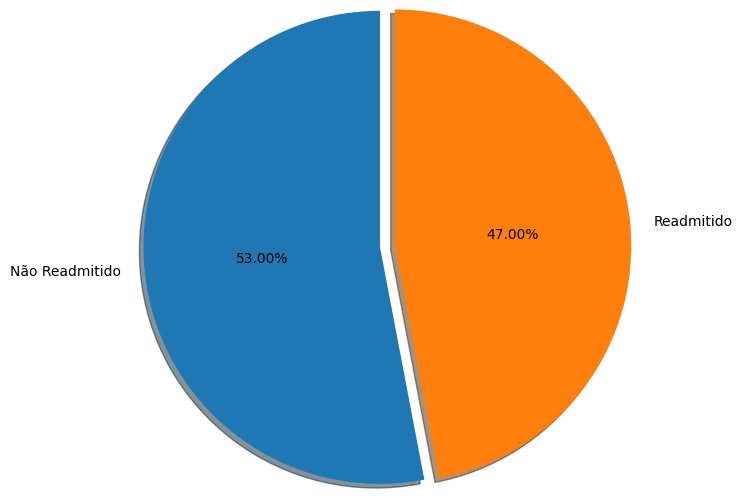

In [27]:
# Vamos visualizar de forma gráfica
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)
plt.pie(percentual , 
        labels = ['Não Readmitido', 'Readmitido'],
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05,0.05],
        startangle = 90,
        shadow = True,
        pctdistance = 0.5)
plt.show()

Cerca de 47% dos pacientes de diabetes foram readmitidos nos hospitais.

### Recategorização de Variável

Como tratamos a variável idade?

In [28]:
# Tipo da variável
dados.age.dtype

dtype('O')

In [29]:
# Total de pacientes por faixa etária
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'Count')

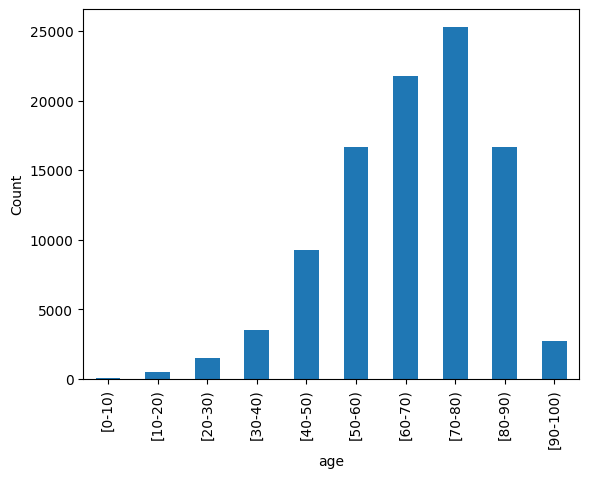

In [30]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

Podemos perceber que a maioria dos pacientes está na faixa entre 50 e 90 anos. 

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente. 

Podemos adotar duas abordagens:

- 1- Se queremos ver o efeito do aumento da idade na readmissão do paciente, mesmo que de maneira grosseira, podemos assumir que a idade do paciente, em média, esteja no ponto médio da categoria de idade. Por exemplo, se a categoria de idade do paciente é de 20 a 30 anos, assumimos a idade = 25 anos. Então, convertemos categorias de idade em pontos médios, resultando em uma variável numérica.


- 2- Podemos recategorizar a variável, distribuindo os pacientes por um número menor de faixas e manter a variável como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade.

Adotaremos a opção 2 pois altera menos a informação contida nos dados.

In [31]:
# Recategorizamos 'idade' para que a população seja distribuída de maneira mais uniforme

# Classificamos como faixa de 0-50 pacientes de até 50 anos
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val 
                          for val in dados['age']], index = dados.index)

# Acima de 80 anos ficam na faixa de 80-100
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val 
                          for val in dados['age']], index = dados.index)

# As outras faixas são mantidas

In [32]:
# Tipo ds variável
dados.age.dtype

dtype('O')

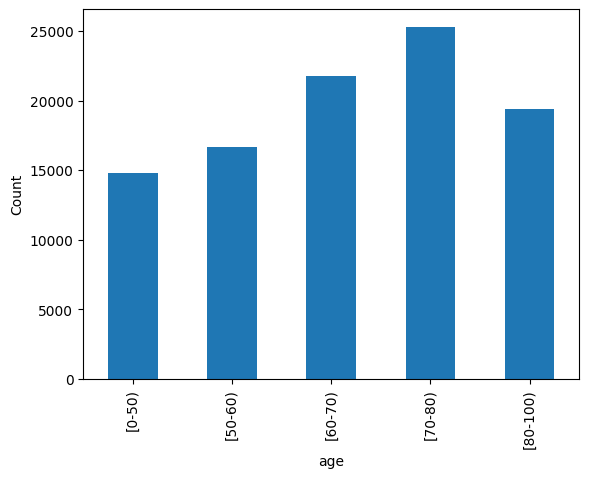

In [33]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')
plt.show()

Como tratamos variáveis do tipo ID? Seguiremos com a Recategorização de Variável.

Uma análise mais detalhada do arquivo IDs_mapping.csv revelará que 'admission_type_id', 'harge_disposition_id' e 'admission_source_id' têm valores com significado semelhante. Eles podem ser mesclados para ter menos valores.

In [34]:
# Visualiza
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


Variável **admission_type_id**

In [35]:
dados.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [36]:
dados.admission_type_id.nunique()

8

In [37]:
# A variável 'admission_type_id' contém 8 níveis
# Reduziremos os níveis de 'admission_type_id' para duas categorias
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro' 
                                        for val in dados['admission_type_id']], index = dados.index)

In [38]:
dados.admission_type_id.nunique()

2

In [39]:
dados.admission_type_id.value_counts()

admission_type_id
Emergencia    52178
Outro         45874
Name: count, dtype: int64

Variável **discharge_disposition_id**

In [40]:
dados.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [41]:
dados.discharge_disposition_id.nunique()

26

In [42]:
# A variável 'discharge_disposition_id' contém 26 níveis
# Reduziremos os níveis de 'discharge_disposition_id' para duas categorias
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro' 
                                              for val in dados['discharge_disposition_id']], index = dados.index)

In [43]:
dados.discharge_disposition_id.nunique()

2

In [44]:
dados.discharge_disposition_id.value_counts()

discharge_disposition_id
Casa     57609
Outro    40443
Name: count, dtype: int64

Variável **admission_source_id**

In [45]:
dados.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [46]:
dados.admission_source_id.nunique()

17

In [47]:
# A variável 'admission_source_id' contém 17 níveis
# # Reduziremos os níveis de 'admission_source_id' para três categorias
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro' 
                                              for val in dados['admission_source_id']], index = dados.index)


In [48]:
dados.admission_source_id.nunique()

3

In [49]:
dados.admission_source_id.value_counts()

admission_source_id
Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: count, dtype: int64

Como tratamos as variáveis 'diag_1', 'diag_2' e 'diag_3' que representam o diagnóstico médico?

O conjunto de dados contém até três diagnósticos para um determinado paciente (primário, secundário e adicional). 

No entanto, cada um deles tem códigos ICD-9 exclusivos e é extremamente difícil incluí-los no modelo e interpretar de forma significativa. 

Portanto, reduziremos esses códigos de diagnóstico para 4 categorias.

Códigos ICD-9 (International Classification of Diseases ou Código Internacional de Doenças):

https://en.wikipedia.org/wiki/List_of_ICD-9_codes

http://www.icd9data.com/2013/Volume1/default.htm

https://icd.codes/icd9cm

https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes

In [50]:
# Concatena 3 variáveis em um dataframe
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [51]:
# Visualiza os dados
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [52]:
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

**Calculando a Comorbidade**

Defining Comorbidity: Implications for Understanding Health and Health Services:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2713155/


In [53]:
# Vamos aplicar expressões regulares para buscar por um padrão e por isso precisamos do pacote re
import re

In [54]:
# Visualiza os dados
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [55]:
def calcula_comorbidade(row):
    cod_diabetes = "^[2][5][0]"
    cod_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"

    # Verifica a presença das doenças
    tem_diabetes = any(bool(re.match(cod_diabetes, str(row[diag]))) for diag in ['diag_1', 'diag_2', 'diag_3'])
    tem_circulatorios = any(bool(re.match(cod_circulatorios, str(row[diag]))) for diag in ['diag_1', 'diag_2', 'diag_3'])

    # Retorna o valor correspondente
    return int(tem_diabetes) + 2 * int(tem_circulatorios)


> Aplicamos a função aos dados

In [56]:
%%time
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

CPU times: total: 1.05 s
Wall time: 1.05 s


In [57]:
# Shape
dados.shape

(98052, 45)

In [58]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [59]:
# Valores únicos
dados['comorbidade'].unique()

array([1, 3, 2, 0], dtype=int64)

In [60]:
# Valores únicos contagem
dados['comorbidade'].value_counts()

comorbidade
2    39551
0    22645
1    18192
3    17664
Name: count, dtype: int64

In [61]:
# Drop das variáveis individuais
dados.drop(['diag_1','diag_2','diag_3'], axis = 1, inplace = True)

In [62]:
# Calcula o percentual de comorbidade por tipo e por classe da variável alvo
percent_com = pd.crosstab(dados.comorbidade , dados.readmitted , normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


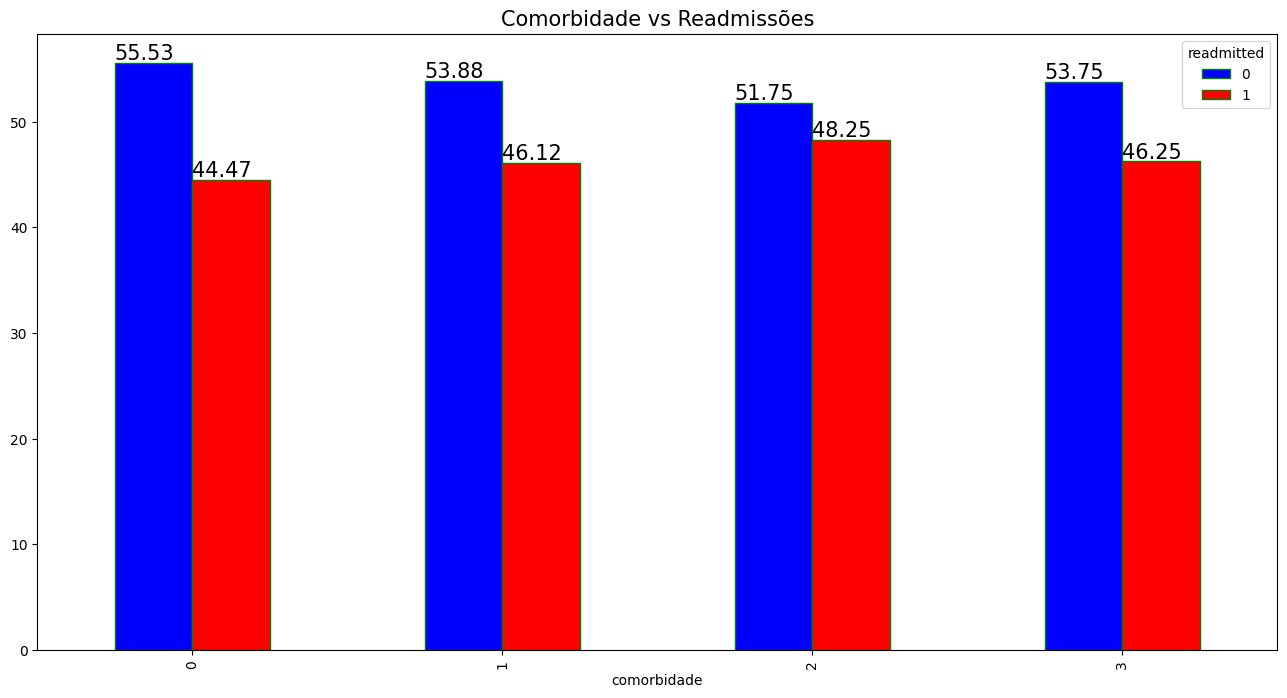

In [63]:
# Plot
fig = percent_com.plot(kind = 'bar', 
                       figsize = (16, 8), 
                       width = 0.5, 
                       edgecolor = 'g', 
                       color = ['b','r'])
for i in fig .patches:
    fig.text(i.get_x() + 0.00, 
             i.get_height() + 0.3, 
             str(round((i.get_height()), 2)), 
             fontsize = 15, 
             color = 'black',
             rotation = 0)

plt.title("Comorbidade vs Readmissões", fontsize = 15)
plt.show()

### Legenda do gráfico:

Valor 0 indica que:
Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

Valor 1 indica que:
Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

Valor 2 indica que:
Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

Valor 3 indica que:
Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de 
forma simultânea no paciente

**Variáveis de Dosagem de Medicamentos e Agrupamento de Variáveis**

In [64]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


O conjunto de dados contém 23 recursos para 23 medicamentos que indicam, para cada um deles, se uma alteração no medicamento foi feita ou não durante a atual internação do paciente. 

Vamos plotar algumas variáveis que indicam uso de medicamento.

Text(0, 0.5, 'Count')

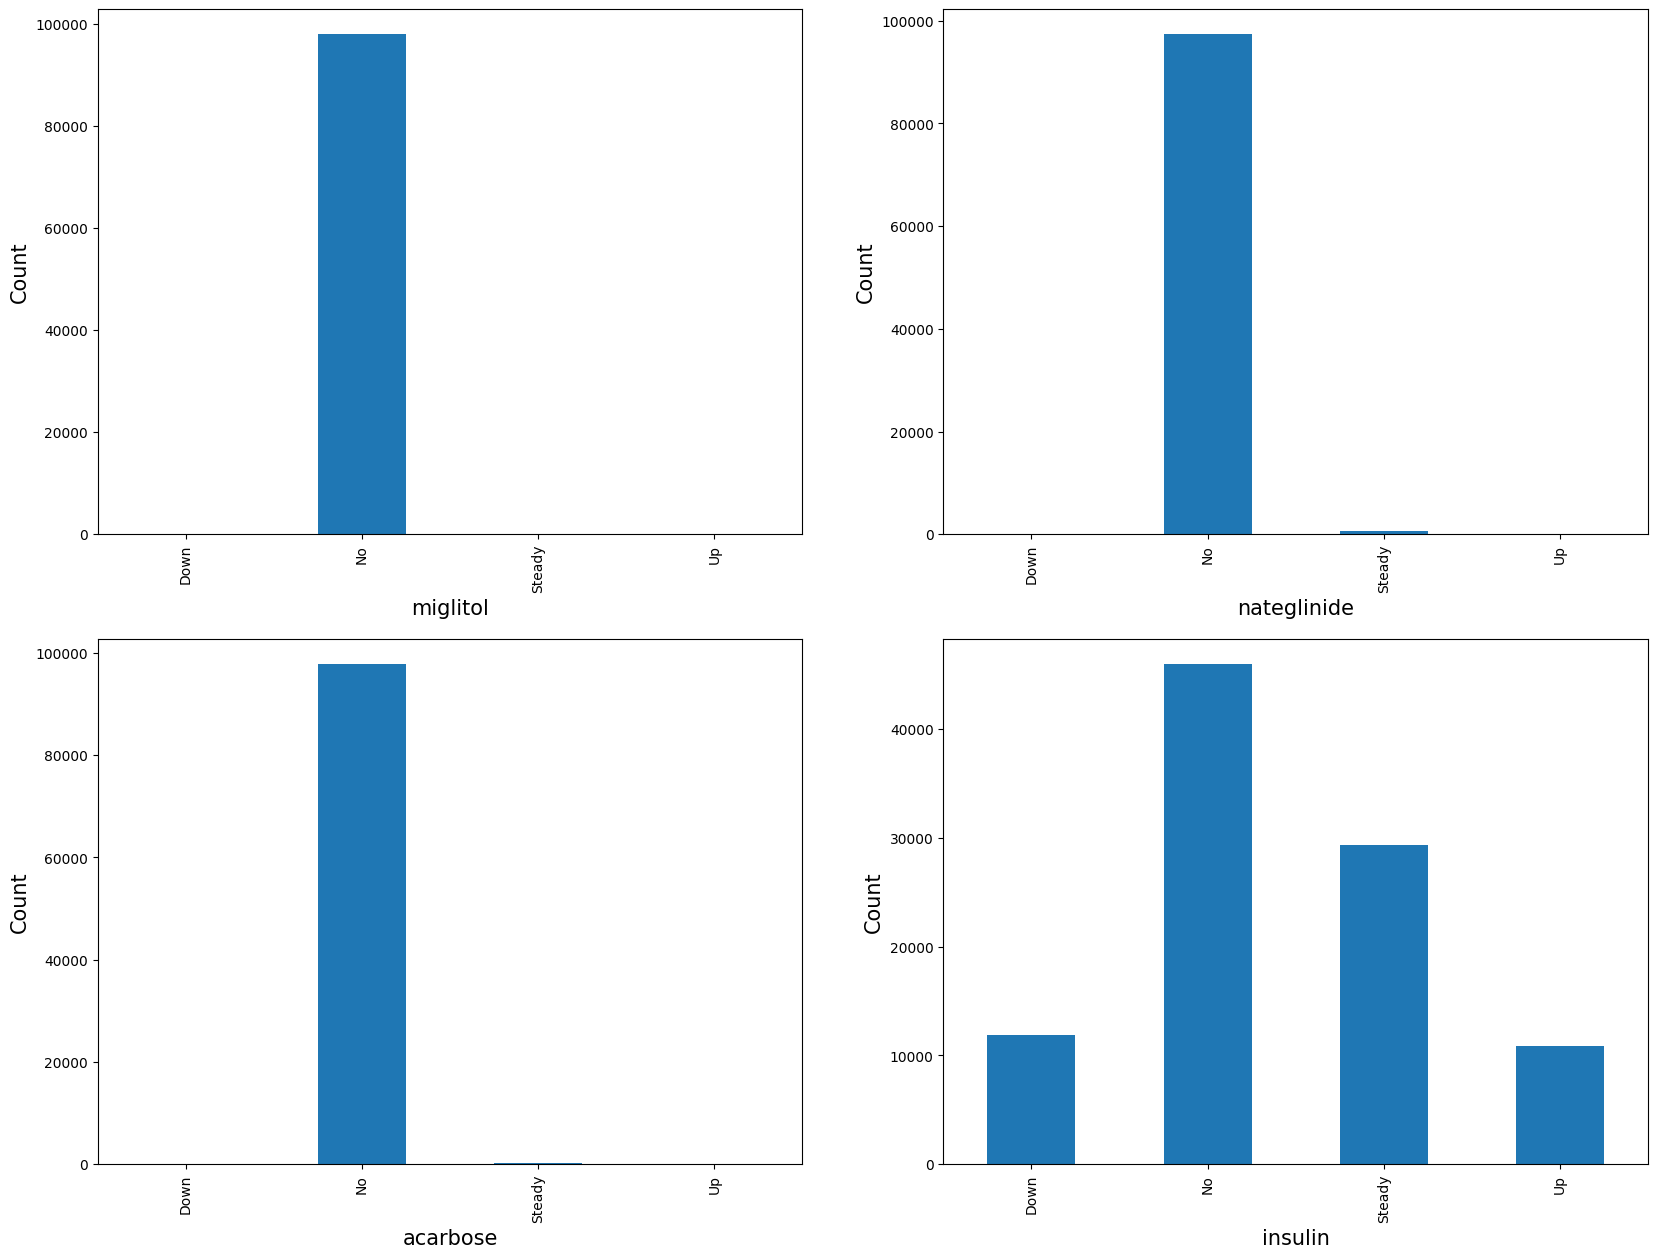

In [65]:
# Plot
fig = plt.figure(figsize = (20,15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Podemos contar quantas alterações foram feitas no total para cada paciente e criamos um novo atributo. Isso pode ajudar a descobrir uma relação com o número de alterações, independentemente de qual medicamento foi alterado.

Além disso, podemos criar um novo atributo indicando o total de medicamentos que cada paciente consumiu durante a internação. E então avaliamos se há relação do total com a readmissão.

In [66]:
# Shape
dados.shape

(98052, 42)

In [67]:
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [68]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [69]:
# Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [70]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# Cria uma variável para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

In [72]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [73]:
# Verifica o total por modificações na dosagem de medicamentos
dados.num_alt_dosagem_med.value_counts()

num_alt_dosagem_med
0    71309
1    25350
2     1281
3      107
4        5
Name: count, dtype: int64

In [74]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,Up,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,Up,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,Steady,No,No,No,No,No,Yes,1,3,0


Vamos alterar o valor das colunas dos medicamentos para refletir se esse medicamento está sendo administrado a um paciente ou não.

In [75]:
# Recoding das colunas de medicamentos
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1) 

Agora, criamos mais uma coluna para refletir quantos medicamentos estão sendo administrados a um paciente.

In [76]:
# Variável com a contagem de medicamentos por paciente
dados['num_med'] = 0

In [77]:
# Carregamos a nova variável
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [78]:
# Verifica o total de medicamentos
dados['num_med'].value_counts()

num_med
1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: count, dtype: int64

Depois de criar essas duas colunas, podemos remover as colunas dos medicamentos.

In [79]:
# Remove as colunas de medicamentos
dados = dados.drop(columns = medicamentos)

In [80]:
# Shape
dados.shape

(98052, 24)

In [81]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,NaN,NaN,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,NaN,NaN,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,NaN,NaN,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,NaN,NaN,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,9,NaN,NaN,No,Yes,1,3,0,1


In [82]:
# Variáveis
dados.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                  object
comorbidade                  int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

**Recoding de variáveis categóricas**

Vamos fazer o recoding de algumas variáveis categóricas.

In [83]:
dados['change'].value_counts()

change
No    52774
Ch    45278
Name: count, dtype: int64

In [84]:
dados['gender'].value_counts()

gender
Female    52833
Male      45219
Name: count, dtype: int64

In [85]:
dados['diabetesMed'].value_counts()

diabetesMed
Yes    75350
No     22702
Name: count, dtype: int64

In [86]:
# Recoding de variáveis categóricas binárias
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

In [87]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,NaN,NaN,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,NaN,NaN,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,NaN,NaN,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,NaN,NaN,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,NaN,NaN,0,1,1,3,0,1


Também reduziremos o resultado do teste A1C e o resultado do teste sérico de glicose em categorias de Normal, Anormal e Não Testado, com valores 1, 0 e -99, respectivamente.

In [88]:
dados['A1Cresult'].value_counts()

A1Cresult
>8      7631
Norm    4854
>7      3708
Name: count, dtype: int64

In [89]:
dados['max_glu_serum'].value_counts()

max_glu_serum
Norm    2532
>200    1449
>300    1227
Name: count, dtype: int64

In [90]:
# Dicionários de mapeamento
map_a1cresult = {'>7': 1, '>8': 1, 'Norm': 0}
map_max_glu_serum = {'>200': 1, '>300': 1, 'Norm': 0}

# Aplicando a transformação
dados['A1Cresult'] = dados['A1Cresult'].replace(map_a1cresult).fillna(-99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace(map_max_glu_serum).fillna(-99)

In [91]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99.0,-99.0,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99.0,-99.0,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99.0,-99.0,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99.0,-99.0,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99.0,-99.0,0,1,1,3,0,1


Alguns pacientes no conjunto de dados tiveram mais de um encontro (consulta). 

Não podemos contá-los como encontros independentes, porque isso influencia os resultados para aqueles pacientes que tiveram vários encontros. Assim, tentamos várias técnicas para recolher e consolidar vários encontros para o mesmo paciente, como:

- Considerar a permanência média no hospital em vários encontros.
- Considerar a porcentagem de alterações na medicação em vários encontros.
- Considerar o número total de encontros para substituir o ID exclusivo do encontro.
- Considerar a combinação de diagnósticos em vários encontros como uma lista.

Por fim, o ideal foi deixar apenas um registro de encontro para cada paciente e optamos por manter o primeiro.

In [92]:
# Removendo duplicidades por id de paciente, mantendo o primeiro registro
dados = dados.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [93]:
# Shape
dados.shape

(68629, 24)

In [94]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99.0,-99.0,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99.0,-99.0,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99.0,-99.0,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99.0,-99.0,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99.0,-99.0,0,1,1,3,0,1


In [95]:
# Salvando o dataset
dados.to_csv('dados/dados_parte1.csv', index = False)

# Análise Exploratória

In [96]:
# Carregando os dados
dados = pd.read_csv("dados/dados_parte1.csv")

In [97]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99.0,-99.0,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99.0,-99.0,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99.0,-99.0,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99.0,-99.0,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99.0,-99.0,0,1,1,3,0,1


In [98]:
# Shape
dados.shape

(68629, 24)

In [99]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   encounter_id              68629 non-null  int64  
 1   patient_nbr               68629 non-null  int64  
 2   race                      68629 non-null  object 
 3   gender                    68629 non-null  int64  
 4   age                       68629 non-null  object 
 5   admission_type_id         68629 non-null  object 
 6   discharge_disposition_id  68629 non-null  object 
 7   admission_source_id       68629 non-null  object 
 8   time_in_hospital          68629 non-null  int64  
 9   num_lab_procedures        68629 non-null  int64  
 10  num_procedures            68629 non-null  int64  
 11  num_medications           68629 non-null  int64  
 12  number_outpatient         68629 non-null  int64  
 13  number_emergency          68629 non-null  int64  
 14  number

#### 1- Total de Medicamentos Consumidos Por Faixa Etária

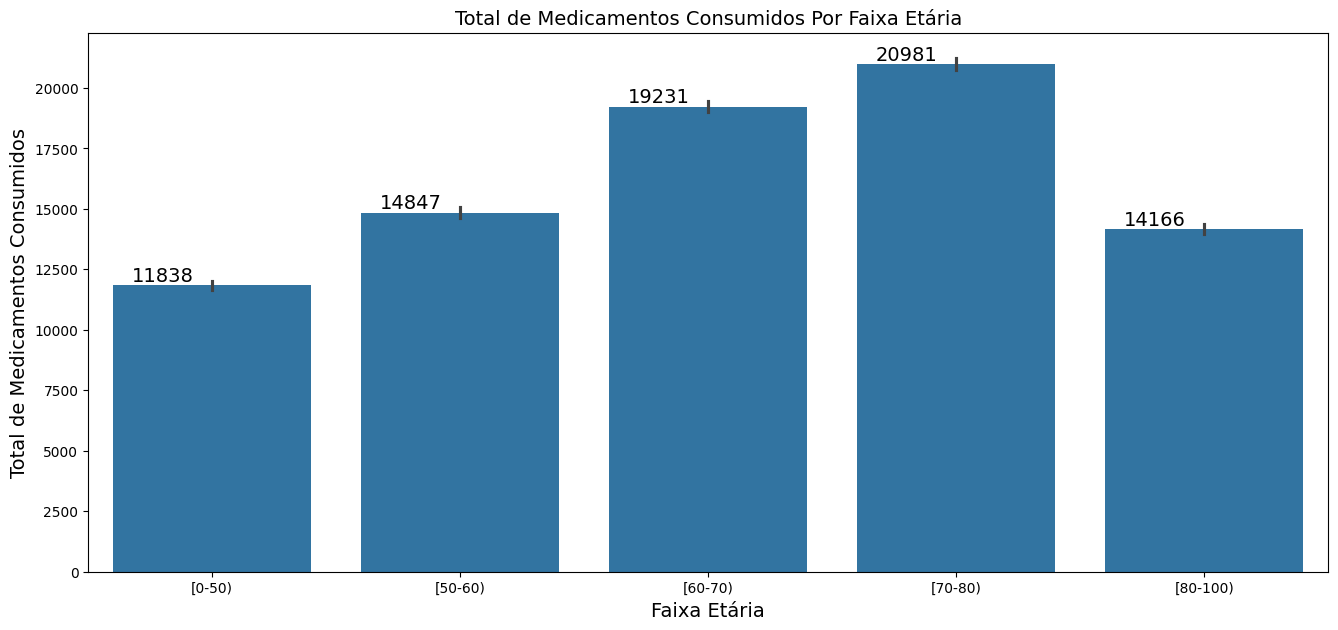

In [100]:
plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')
plt.ylabel("Total de Medicamentos Consumidos", fontsize = 14, color = 'black')
plt.title("Total de Medicamentos Consumidos Por Faixa Etária", fontsize = 14, color = 'black')
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')

plt.show()

#### 2- Total de Readmissões de Pacientes Diabéticos Por Gênero

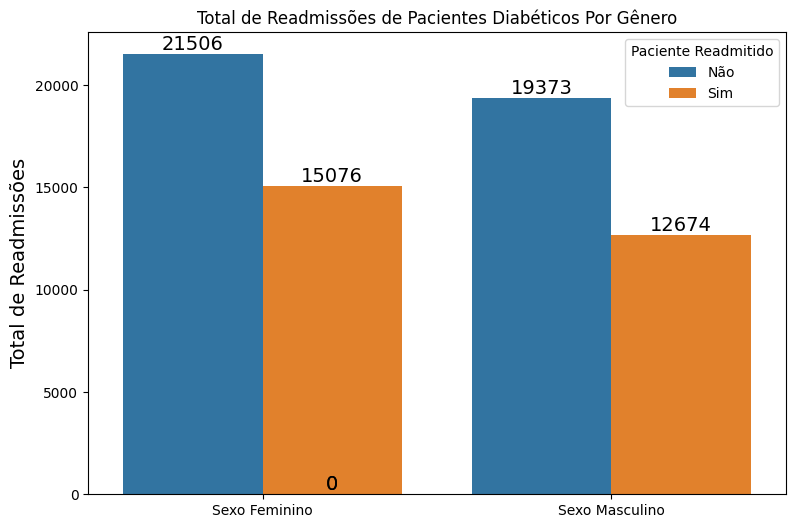

In [101]:
# Criação do gráfico de barras com label encoding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']], 
                     hue = 'readmitted', 
                     data = dados) 

figx.figure.set_size_inches(9,6)
figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
plt.show()

#### 3- Total de Readmissões de Pacientes Por Faixa Etária

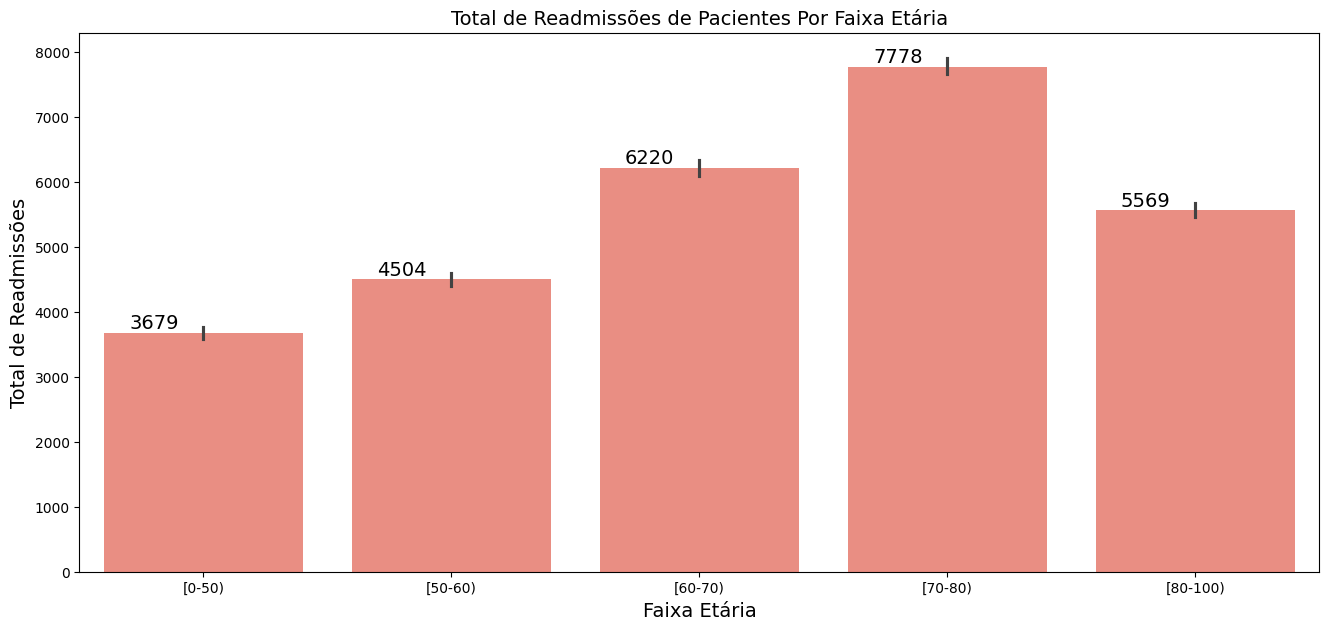

In [102]:
plt.figure(figsize = (16,7))

figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados, color = 'salmon')
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')
plt.title("Total de Readmissões de Pacientes Por Faixa Etária", fontsize = 14, color = 'black')
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()), 
                  (p.get_x() + 0.2, p.get_height()), 
                  ha = 'center', 
                  va = 'bottom', 
                  fontsize = 14,
                  color = 'black')
    
plt.show()

#### 4- Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

In [103]:
# Primeiro calculamos os percentuais
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


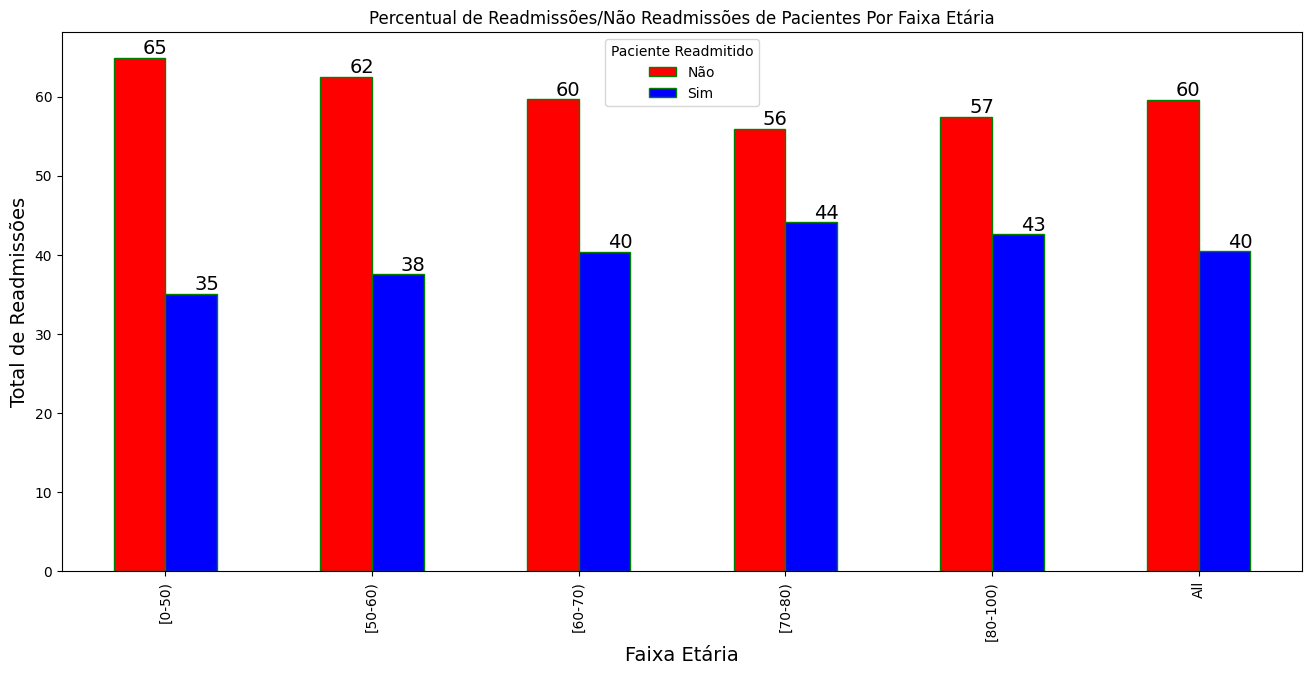

In [104]:
fig = percentual_idade_readmissao.plot(kind = 'bar', 
                                       figsize = (16, 7), 
                                       width = 0.5,
                                       edgecolor = 'g', 
                                       color = ['r', 'b'])

plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.xlabel("Faixa Etária", fontsize = 14, color = 'black')
plt.ylabel("Total de Readmissões", fontsize = 14, color = 'black')
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária", fontsize = 12)
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.2, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.show()

#### 5- Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

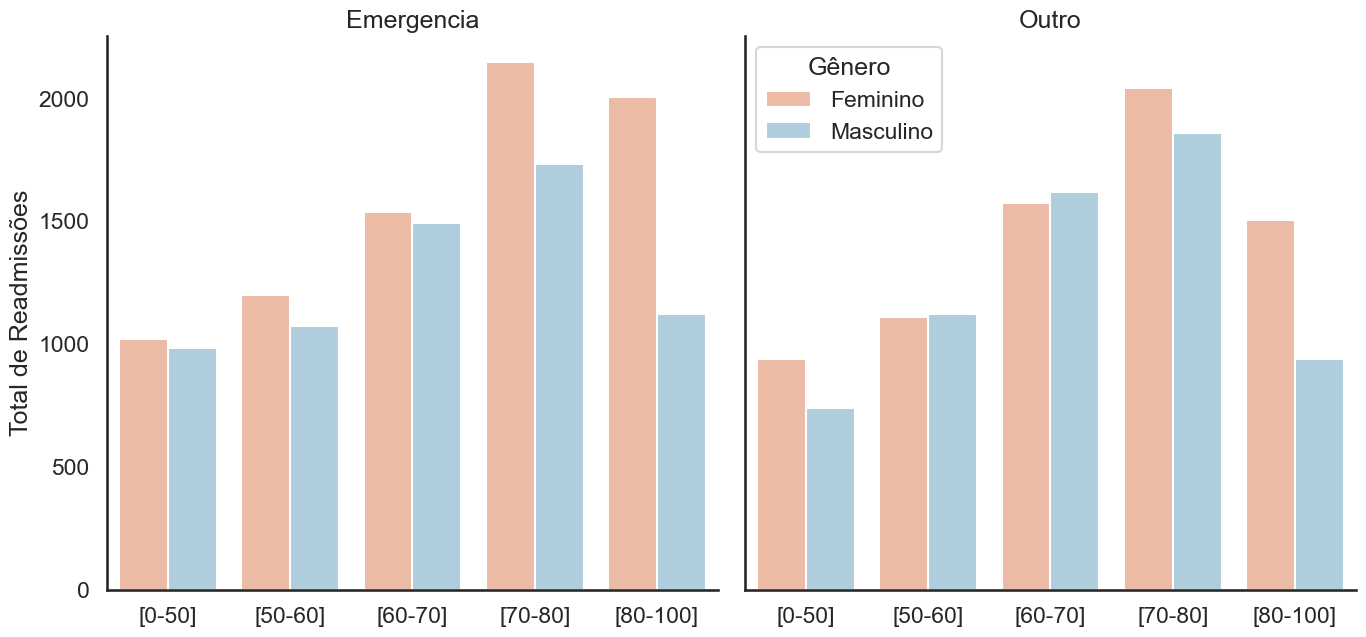

In [105]:
sns.set(style = "white", context = "talk")
g = sns.catplot(x = 'age', 
                y = 'readmitted', 
                hue = 'gender', 
                col = 'admission_type_id',
                estimator = np.sum, 
                data = dados, 
                palette = "RdBu", 
                kind = "bar",
                height = 7, 
                aspect = 1,
                legend = False,
                ci = None)

(g.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))
plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])
plt.show(g)

####  6- Total de Readmissões/Não Readmissões Por Gênero e Por Raça

In [106]:
# Cria um dataframe temporário para ajustar o label da variável target para o plot
df_temp = dados

In [107]:
# Faz o mapeamento de 0 e 1 para labels
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

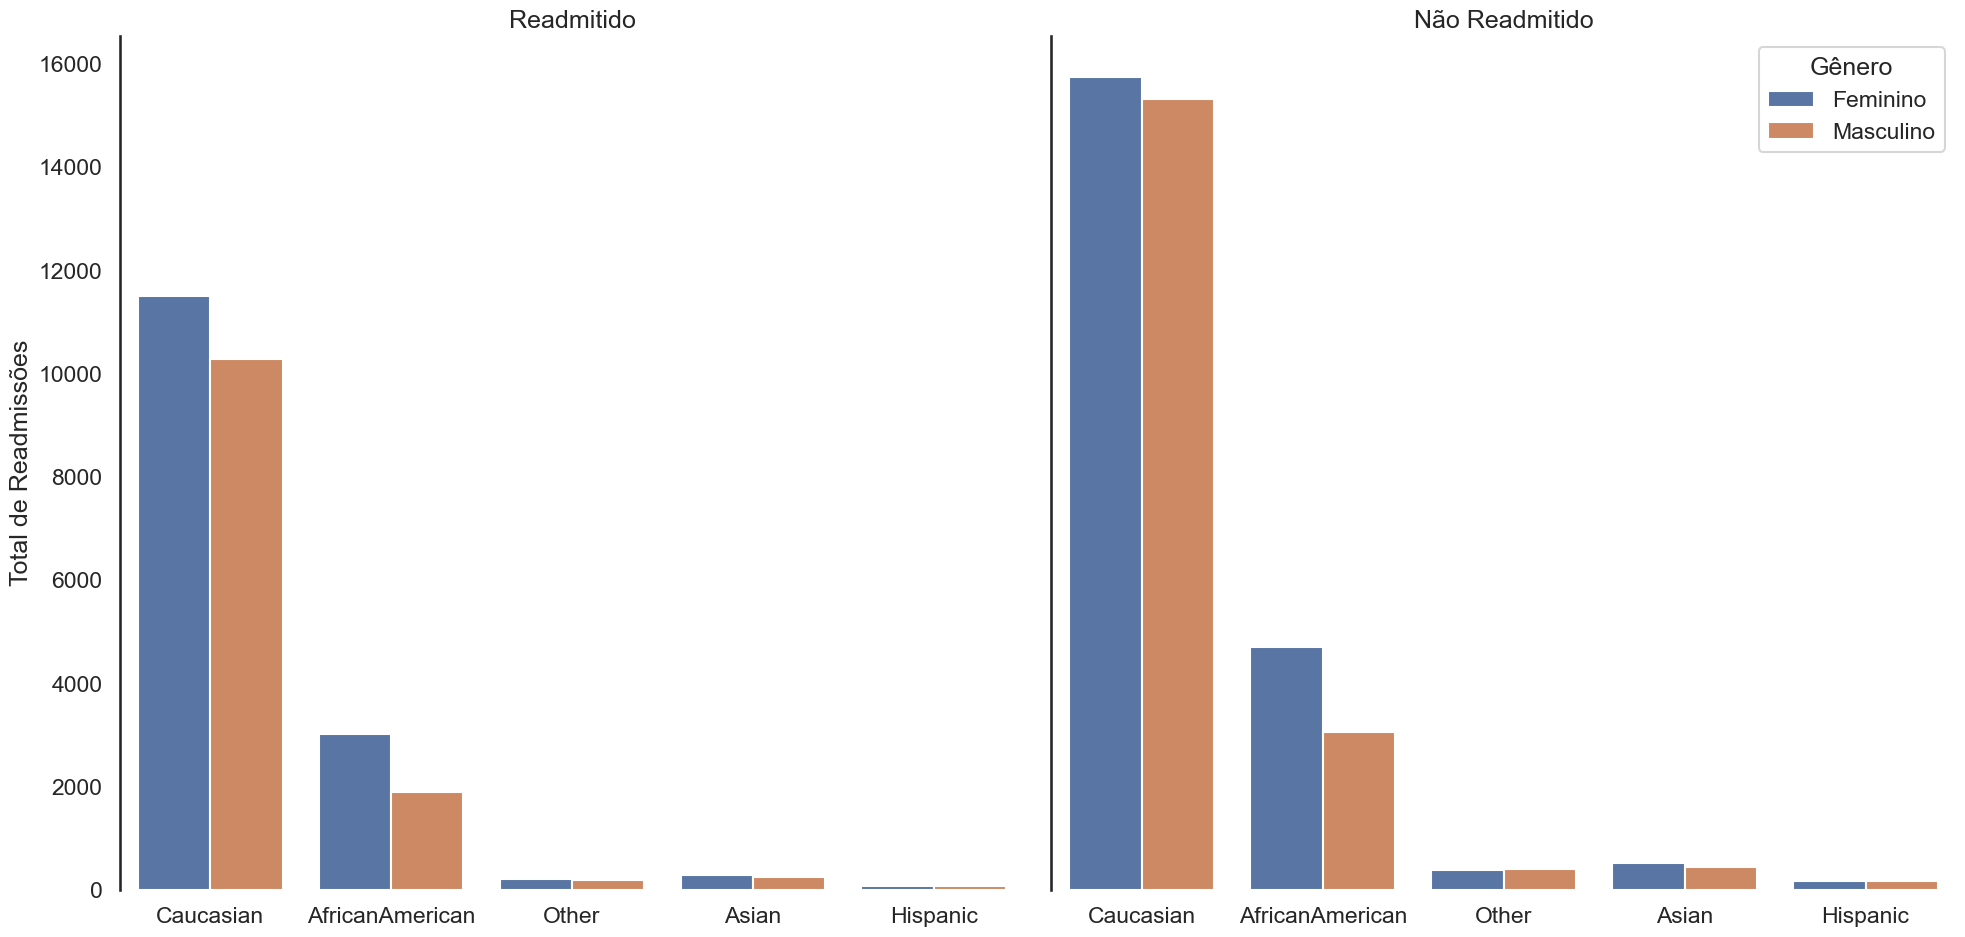

In [108]:
# Remove o background
sns.set(style = "white", context = "talk")

# Cria uma função para personalizar a quantidade de parâmetros
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# Cria um facetgrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))
plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])
sns.despine(bottom = True)

#### 7- Número de Visitas x Comorbidade

In [109]:
# Criamos a tabela de contigência
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

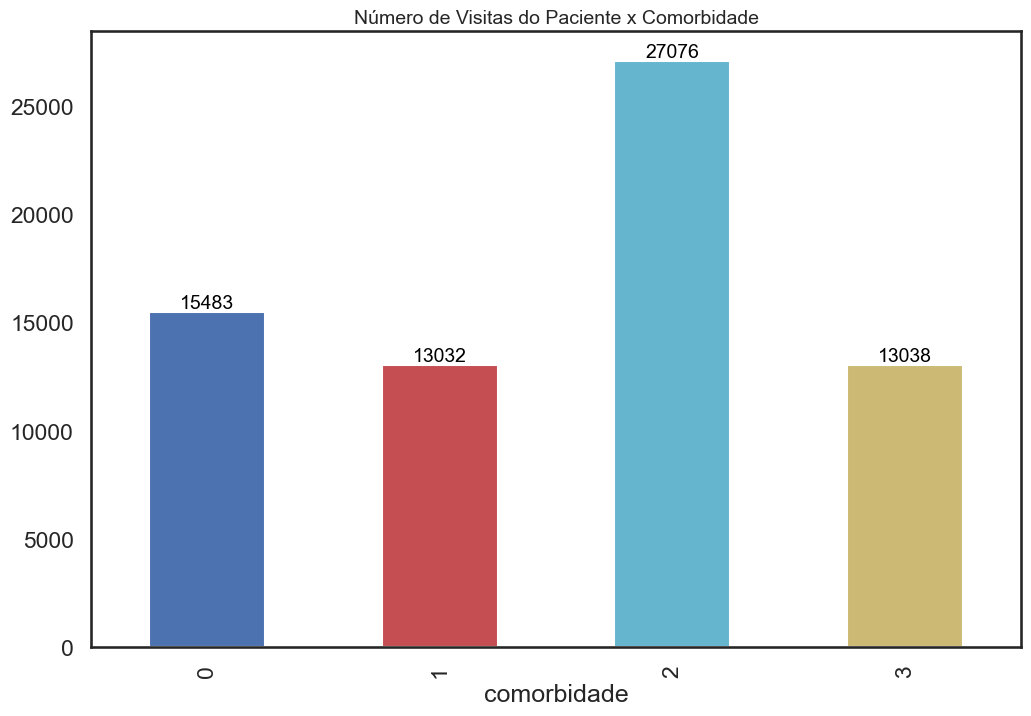

In [110]:
sns.set(style = "white", context = "talk")
fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8), 
                                   width = 0.5,
                                   color = ['b','r','c','y'],
                                   rot = 90)

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.25, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')

plt.title("Número de Visitas do Paciente x Comorbidade", fontsize = 14)
plt.show()

#### 8- Proporção de Readmissões Pelo Número de Visitas Antes da Alta

In [111]:
# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient , dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


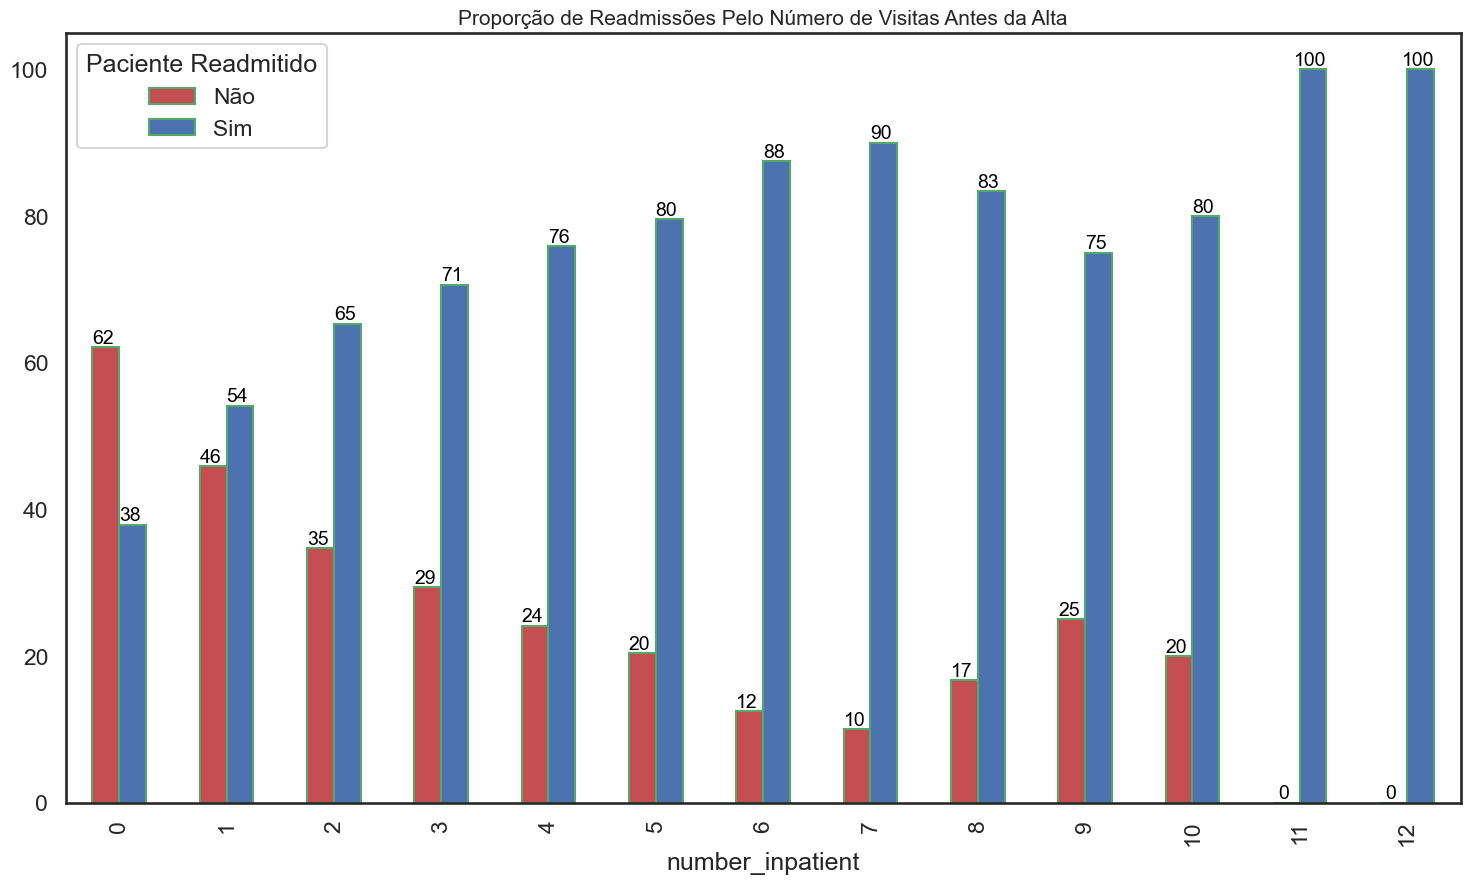

In [112]:
# Cria o gráfico
fig = percent_visitas_readm.plot(kind = 'bar', figsize = (18,10), width = 0.5, edgecolor = 'g', color = ['r','b'])
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), 
                 (p.get_x() + 0.1, p.get_height()), 
                 ha = 'center', 
                 va = 'bottom', 
                 fontsize = 14,
                 color = 'black')
plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta", fontsize = 15)
fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
plt.show()

#### 9- Gráficos Estatísticos¶

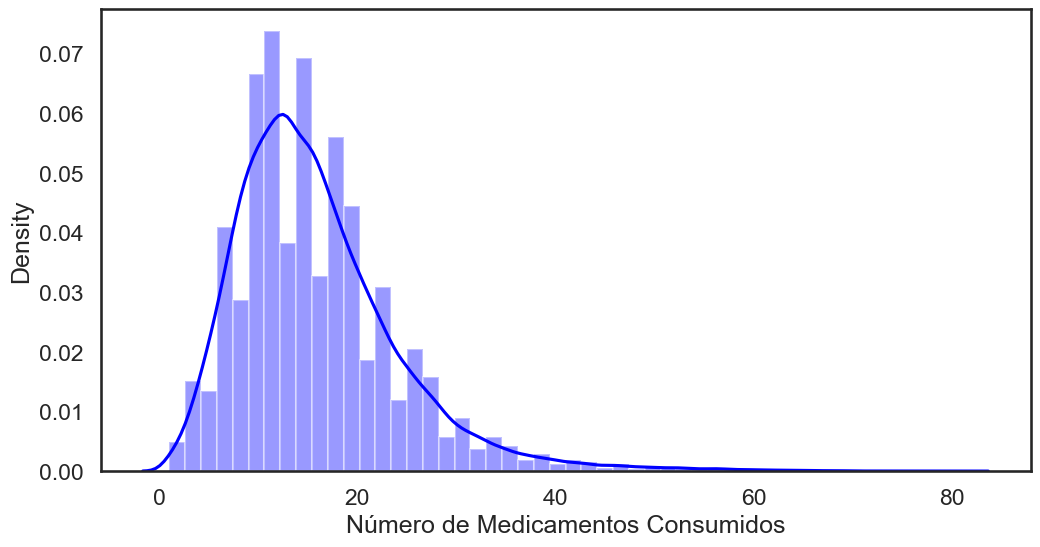

In [113]:
plt.figure(figsize = (12,6))

sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")
plt.show()

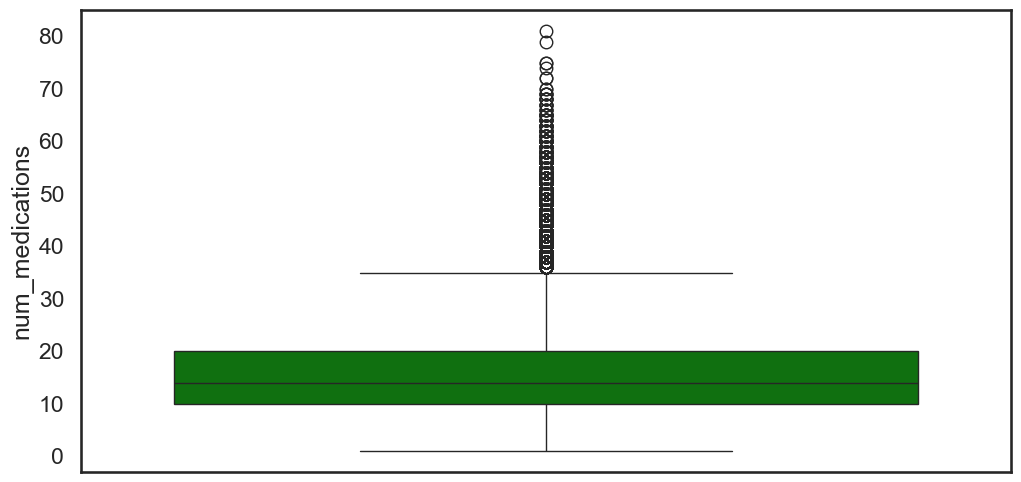

In [114]:
plt.figure(figsize = (12,6))

sns.boxplot(dados['num_medications'], color = 'Green')
plt.show()

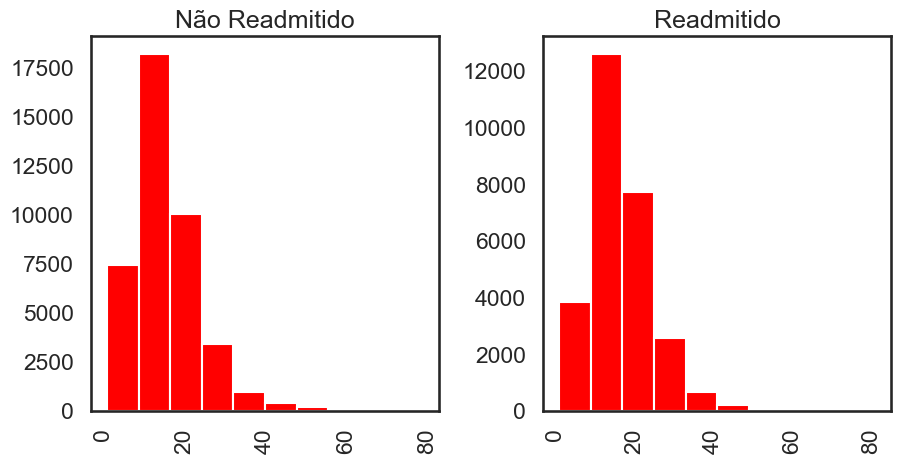

In [115]:
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,5), color = 'Red')
plt.show()

# Fim